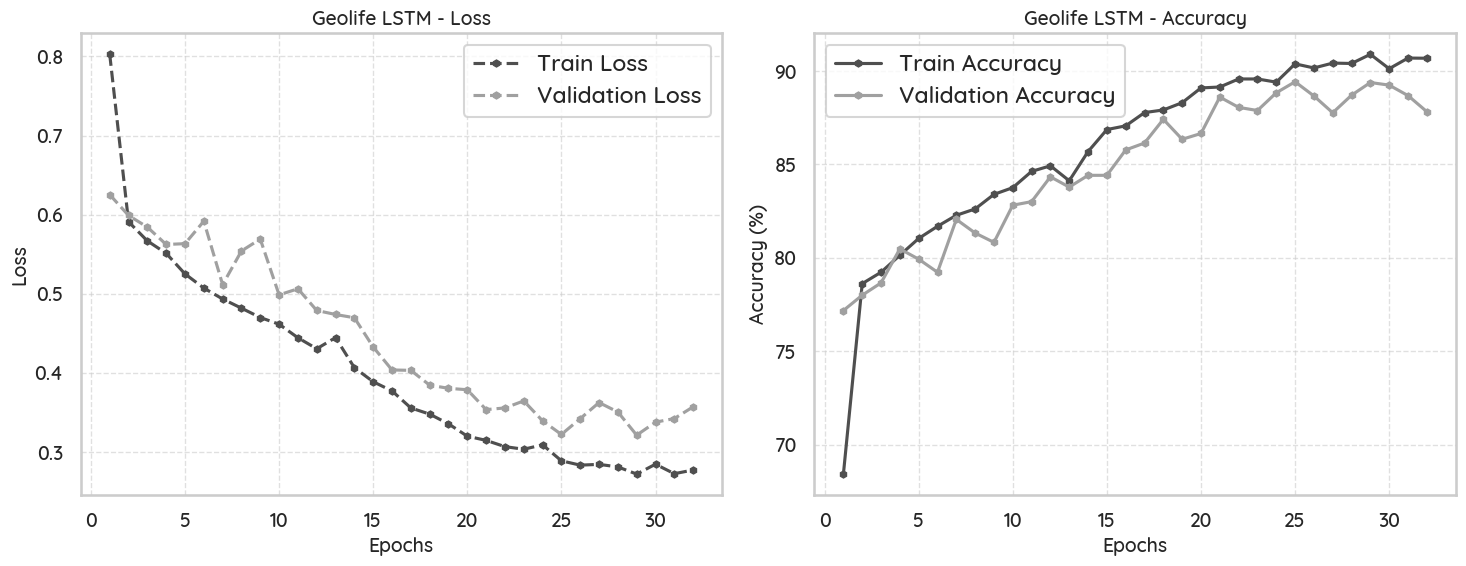

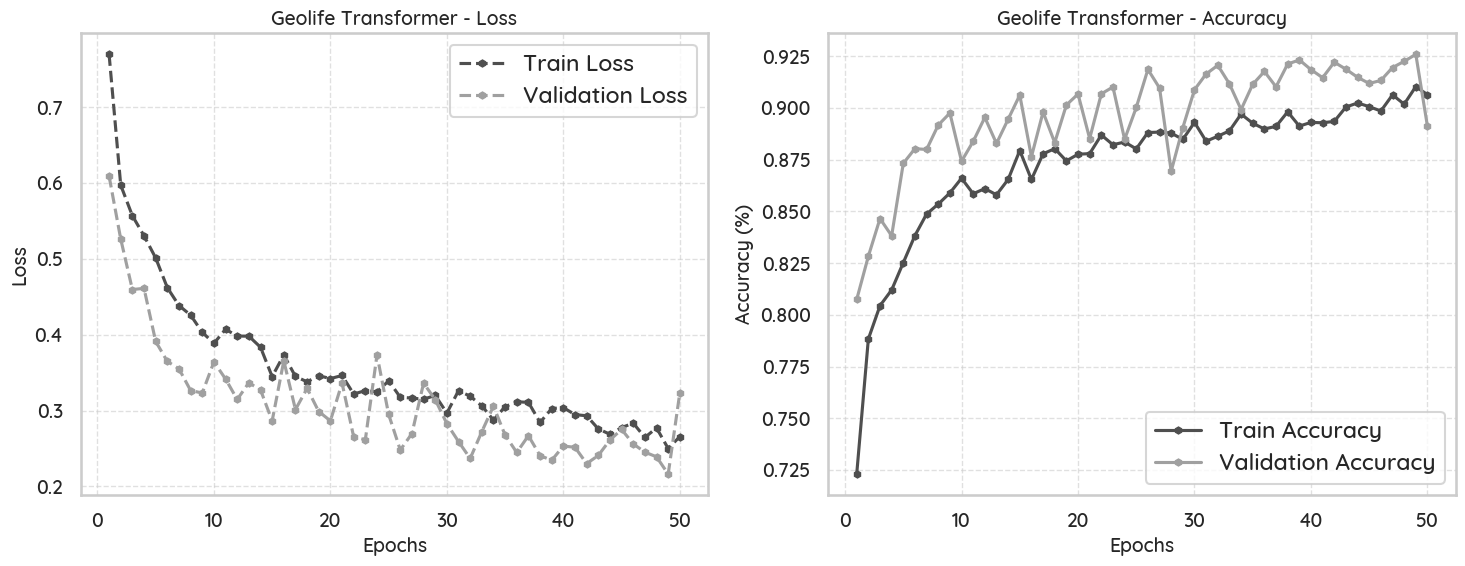

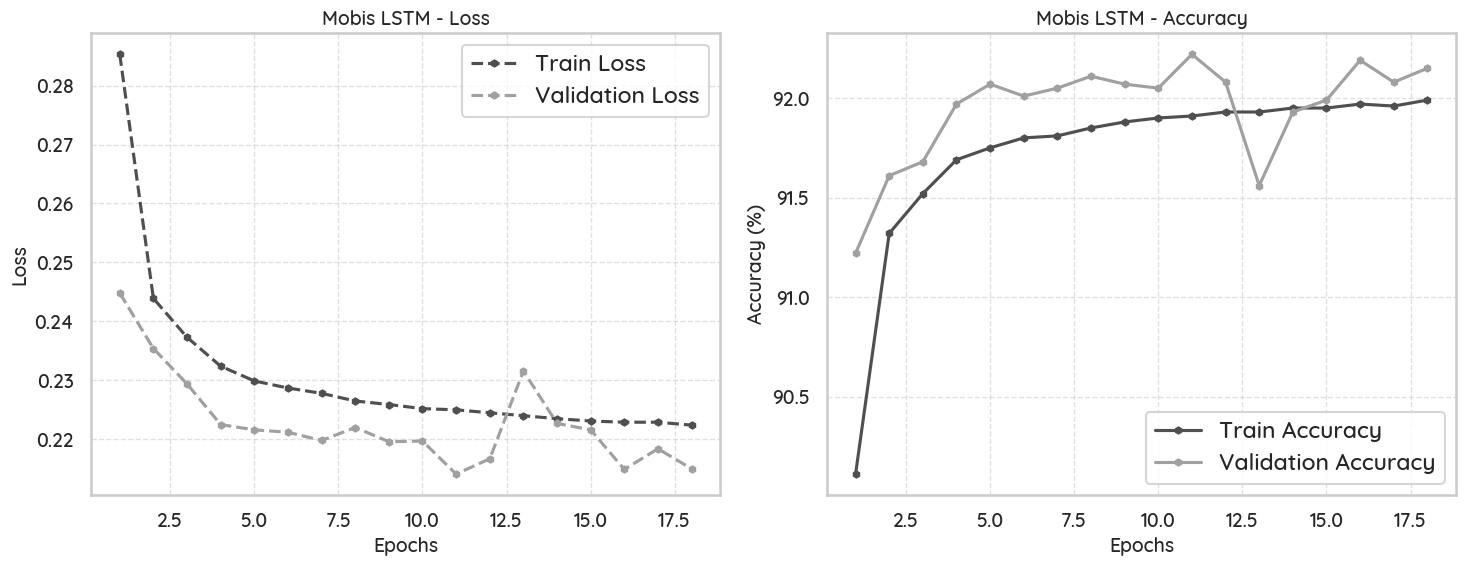

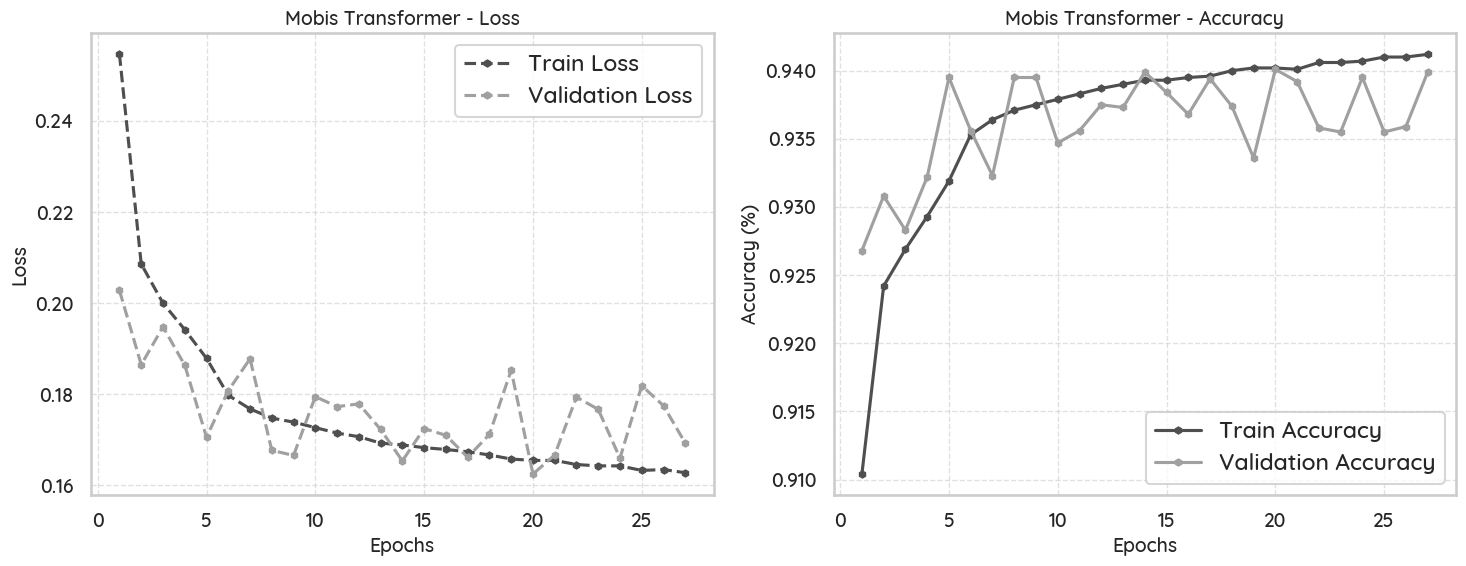

In [2]:
import re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the style for aesthetic plots
# sns.set_theme(style="whitegrid", palette="pastel")
sns.set_theme(style="whitegrid", 
              palette="dark", 
              font="Quicksand Medium", 
              rc={
                "grid.linewidth": 1,    # Thinner gridlines
                "xtick.labelsize": 14,       # X-axis tick labels
                "ytick.labelsize": 14,       # Y-axis tick labels
                "axes.titlesize": 14,     # Larger title font
                "axes.labelsize": 14,     # Adjust label font size
                "legend.frameon": True,   # Add a frame to the legend
                  }, 
              context="talk")

# File paths for different experiments
file_paths = {
    "Geolife LSTM": "/data/A-TrajectoryTransformer/models/lstm/geolife/lstm.log",
    "Geolife Transformer": "/data/A-TrajectoryTransformer/models/transformer/geolife/train.log",
    "Mobis LSTM": "/data/A-TrajectoryTransformer/models/lstm/mobis/lstm.log",
    "Mobis Transformer": "/data/A-TrajectoryTransformer/models/transformer/mobis/train.log",
}

# Patterns for LSTM
lstm_patterns = {
    "train_loss": r"Train Loss: ([\d.]+)",
    "train_acc": r"Train Acc: ([\d.]+)",
    "val_loss": r"Val Loss: ([\d.]+)",
    "val_acc": r"Val Acc: ([\d.]+)",
}

# Patterns for Transformer
transformer_patterns = {
    "train_loss": r"Train Loss: ([\d.]+)",
    "train_acc": r"Train Acc: ([\d.]+)",
    "val_loss": r", Val Loss: ([\d.]+)",
    "val_acc": r"Val Acc: ([\d.]+)",
}

def extract_metrics(file_path, patterns):
    with open(file_path, 'r') as file:
        log_content = file.read()

    train_losses = [float(tl) for tl in re.findall(patterns["train_loss"], log_content)]
    train_accuracies = [float(ta) for ta in re.findall(patterns["train_acc"], log_content)]
    val_losses = [float(vl) for vl in re.findall(patterns["val_loss"], log_content)]
    val_accuracies = [float(va) for va in re.findall(patterns["val_acc"], log_content)]

    return train_losses, train_accuracies, val_losses, val_accuracies

def plot_metrics(epochs, train_losses, val_losses, train_accuracies, val_accuracies, title):
    plt.figure(figsize=(15,6))

    color_lstm = "#4f4f4f"  # Dark grey
    color_transformer = "#a0a0a0"  # Light grey
    # Plot losses
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss', marker='h', markersize=5, linestyle='--', color=color_lstm)
    plt.plot(epochs, val_losses, label='Validation Loss', marker='h', markersize=5, linestyle='--', color=color_transformer)
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Plot accuracies
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy', marker='h', markersize=5, linestyle='-', color=color_lstm)
    plt.plot(epochs, val_accuracies, label='Validation Accuracy', marker='h', markersize=5, linestyle='-', color=color_transformer)
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    save_path = f"{title.replace(' ', '_').lower()}.png"  # Save file as title in lowercase, spaces replaced with underscores
    plt.savefig(save_path, dpi=300, bbox_inches='tight') 
    plt.show()

# Process each file and generate plots
for experiment_name, file_path in file_paths.items():
    # Determine patterns based on model type
    patterns = lstm_patterns if "LSTM" in experiment_name else transformer_patterns
    train_losses, train_accuracies, val_losses, val_accuracies = extract_metrics(file_path, patterns)

    epochs = list(range(1, len(train_accuracies) + 1))
    plot_metrics(epochs, train_losses, val_losses, train_accuracies, val_accuracies, experiment_name)

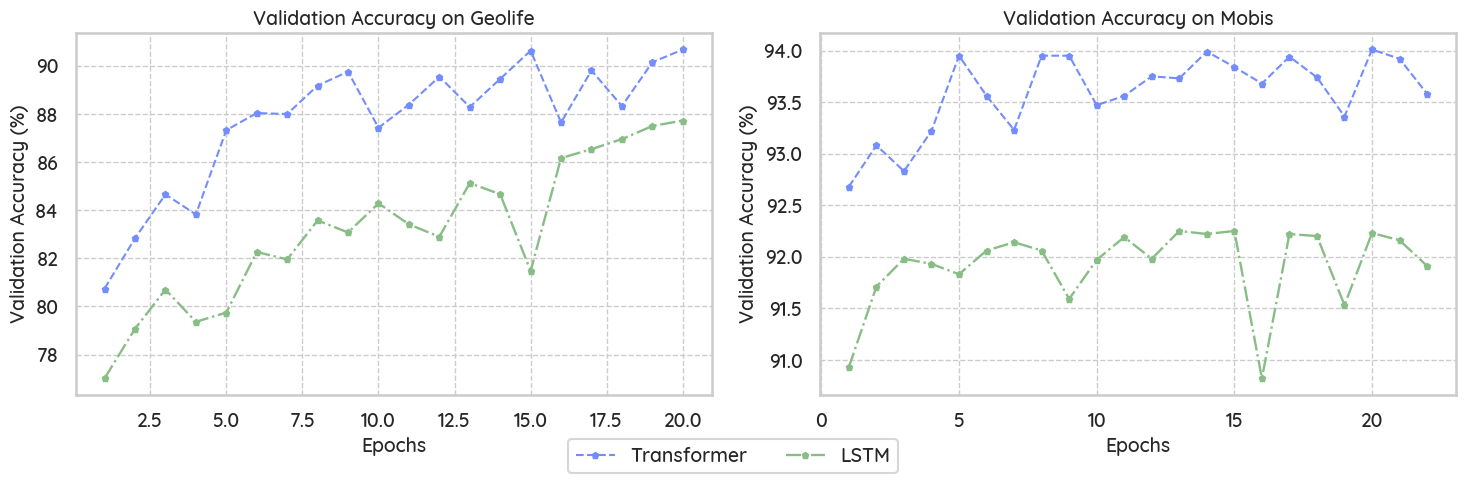

In [3]:
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for aesthetic plots
sns.set_theme(style="whitegrid", 
              palette="dark", 
              font="Quicksand Medium", 
              rc={
                "grid.linewidth": 1,    # Thinner gridlines
                "xtick.labelsize": 14,       # X-axis tick labels
                "ytick.labelsize": 14,       # Y-axis tick labels
                "axes.titlesize": 14,     # Larger title font
                "axes.labelsize": 14,     # Adjust label font size
                "legend.frameon": True,   # Add a frame to the legend
                  }, 
              context="talk")

# File paths for different experiments
file_paths = {
    "Geolife LSTM": "/data/A-SpeedTransformer/models/lstm/geolife/lstm.log",
    "Geolife Transformer": "/data/A-SpeedTransformer/models/transformer/geolife/train.log",
    "Mobis LSTM": "/data/A-SpeedTransformer/models/lstm/mobis/lstm.log",
    "Mobis Transformer": "/data/A-SpeedTransformer/models/transformer/mobis/train.log",
}

# Patterns for LSTM
lstm_patterns = {
    "train_loss": r"Train Loss: ([\d.]+)",
    "train_acc": r"Train Acc: ([\d.]+)",
    "val_loss": r"Val Loss: ([\d.]+)",
    "val_acc": r"Val Acc: ([\d.]+)",
}

# Patterns for Transformer
transformer_patterns = {
    "train_loss": r"Train Loss: ([\d.]+)",
    "train_acc": r"Train Acc: ([\d.]+)",
    "val_loss": r", Val Loss: ([\d.]+)",
    "val_acc": r"Val Acc: ([\d.]+)",
}

def extract_metrics(file_path, patterns):
    with open(file_path, 'r') as file:
        log_content = file.read()

    train_losses = [float(tl) for tl in re.findall(patterns["train_loss"], log_content)]
    train_accuracies = [float(ta) for ta in re.findall(patterns["train_acc"], log_content)]
    val_losses = [float(vl) for vl in re.findall(patterns["val_loss"], log_content)]
    val_accuracies = [float(va) for va in re.findall(patterns["val_acc"], log_content)]

    return train_losses, train_accuracies, val_losses, val_accuracies

def plot_validation_comparison_side_by_side(geolife_data, mobis_data):
    plt.figure(figsize=(15, 5))

    # Determine the min length for both datasets
    min_length_geolife = 20
    # min_length_geolife = min(len(geolife_data[1]), len(geolife_data[3]))
    min_length_mobis = min(len(mobis_data[1]), len(mobis_data[3]))

    # Limit data by min length
    geolife_data = (geolife_data[0][:min_length_geolife], 
                    geolife_data[1][:min_length_geolife],
                    geolife_data[2][:min_length_geolife],
                    geolife_data[3][:min_length_geolife])

    mobis_data = (mobis_data[0][:min_length_mobis], 
                  mobis_data[1][:min_length_mobis],
                  mobis_data[2][:min_length_mobis],
                  mobis_data[3][:min_length_mobis])

    color_lstm = "#88bd85"  # Dark grey
    color_transformer = "#748dfc"  # Light grey
    # Geolife subplot
    plt.subplot(1, 2, 1)
    epochs_lstm, val_acc_lstm, epochs_transformer, val_acc_transformer = geolife_data
    plt.plot(epochs_transformer, [v * 100 for v in val_acc_transformer], label='Transformer', marker='p', linestyle='--', linewidth=1.5, markersize=5, color=color_transformer) # '#62C66A'
    plt.plot(epochs_lstm, val_acc_lstm, label='LSTM', marker='p', linestyle='-.', linewidth=1.7, markersize=5, color=color_lstm) # '#3A86FF'
    plt.title('Validation Accuracy on Geolife', fontsize=14)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Validation Accuracy (%)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=1)
    plt.figlegend(loc='lower center', ncol=2, fontsize=14)

    # Mobis subplot
    plt.subplot(1, 2, 2)
    epochs_lstm, val_acc_lstm, epochs_transformer, val_acc_transformer = mobis_data
    plt.plot(epochs_transformer, [v * 100 for v in val_acc_transformer], label='Transformer', marker='p', linestyle='--', linewidth=1.5, markersize=5, color=color_transformer) # '#62C66A'
    plt.plot(epochs_lstm, val_acc_lstm, label='LSTM', marker='p', linestyle='-.', linewidth=1.7, markersize=5, color=color_lstm) # '#3A86FF'
    plt.title('Validation Accuracy on Mobis', fontsize=14)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Validation Accuracy (%)', fontsize=14)
    plt.grid(True, linestyle='--', alpha=1)
    
    plt.tight_layout()

    save_path = f"val.png"  # Save file as title in lowercase, spaces replaced with underscores
    plt.savefig(save_path, dpi=300, bbox_inches='tight') 
    plt.show()

# Extract metrics for Geolife and Mobis
geolife_lstm_key = "Geolife LSTM"
geolife_transformer_key = "Geolife Transformer"
mobis_lstm_key = "Mobis LSTM"
mobis_transformer_key = "Mobis Transformer"

# Geolife data
train_losses_lstm, train_accuracies_lstm, val_losses_lstm, val_acc_lstm = extract_metrics(file_paths[geolife_lstm_key], lstm_patterns)
epochs_lstm_geolife = list(range(1, len(val_acc_lstm) + 1))
train_losses_transformer, train_accuracies_transformer, val_losses_transformer, val_acc_transformer = extract_metrics(file_paths[geolife_transformer_key], transformer_patterns)
epochs_transformer_geolife = list(range(1, len(val_acc_transformer) + 1))

geolife_data = (epochs_lstm_geolife, val_acc_lstm, epochs_transformer_geolife, val_acc_transformer)

# Mobis data
train_losses_lstm, train_accuracies_lstm, val_losses_lstm, val_acc_lstm = extract_metrics(file_paths[mobis_lstm_key], lstm_patterns)
epochs_lstm_mobis = list(range(1, len(val_acc_lstm) + 1))
train_losses_transformer, train_accuracies_transformer, val_losses_transformer, val_acc_transformer = extract_metrics(file_paths[mobis_transformer_key], transformer_patterns)
epochs_transformer_mobis = list(range(1, len(val_acc_transformer) + 1))

mobis_data = (epochs_lstm_mobis, val_acc_lstm, epochs_transformer_mobis, val_acc_transformer)

# Plot side-by-side comparison
plot_validation_comparison_side_by_side(geolife_data, mobis_data)

In [5]:
import pandas as pd

df = pd.read_csv("/data/A-TrajectoryTransformer/data/carbonClever.csv")

In [6]:
df

,time_diff,speed,distance,traj_id,label
0,16.788,4.491887,20.947168,0601950565e25f15004d2df34936918b,walk
1,17.315,1.150650,5.534309,0601950565e25f15004d2df34936918b,walk
2,20.078,3.033680,16.919507,0601950565e25f15004d2df34936918b,walk
3,11.285,6.326577,19.832063,0601950565e25f15004d2df34936918b,walk
4,10.025,0.264797,0.737387,0601950565e25f15004d2df34936918b,walk
...,...,...,...,...,...
179560,19.996,5.179121,28.767141,fd1ab1d5655d9f0c03379c7f03678ebc,bus
179561,20.002,1.885010,10.473324,fd1ab1d5655d9f0c03379c7f03678ebc,bus
179562,20.015,2.838603,15.781841,fd1ab1d5655d9f0c03379c7f03678ebc,bus
179563,10.011,2.720535,7.565353,fd1ab1d5655d9f0c03379c7f03678ebc,bus


In [9]:
df = pd.read_csv("/data/A-TrajectoryTransformer/data/speed_statistics.csv")

In [10]:
df

,label,count,mean,std,min,max,num_trips,percentile_10,percentile_25,percentile_50,percentile_75,percentile_90
0,walk,153657,2.985856,3.282934,0.100014,14.999632,1073,0.276819,0.627175,1.784053,4.094780,7.653224
1,car,9976,31.353378,28.728154,3.000429,170.858602,87,4.863791,9.786224,22.618558,43.337544,69.207213
2,bus,12403,20.306541,24.912539,1.000494,119.996834,139,1.804636,3.304452,8.767582,28.245606,59.396761
3,bike,3407,17.281861,20.019437,0.501067,79.846176,21,0.981835,2.517154,7.232325,25.469017,52.233185
4,train,122,74.493633,52.575966,3.570093,256.157091,3,9.760043,31.817275,67.481839,102.198300,139.366369


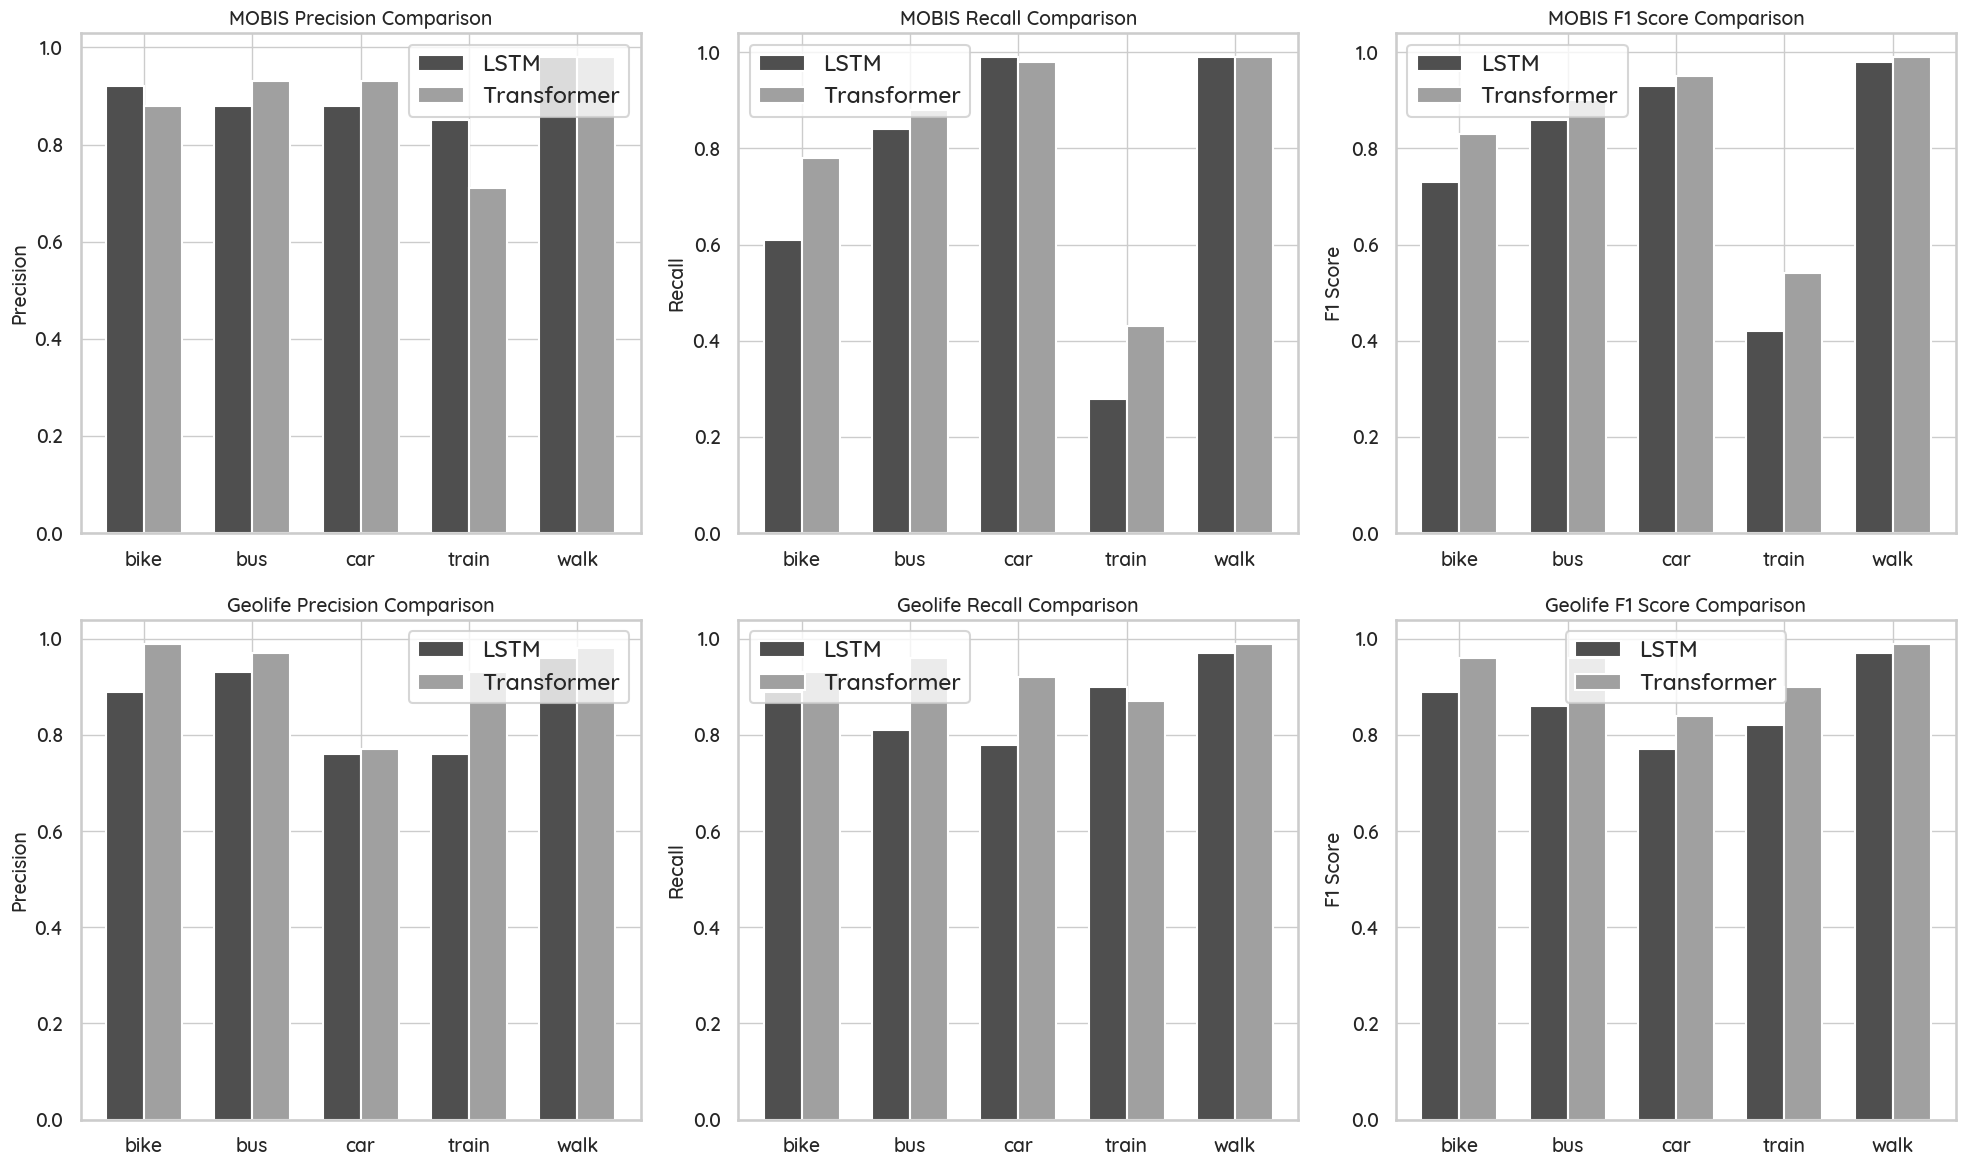

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

# Data extracted from the provided reports
modes = ['bike', 'bus', 'car', 'train', 'walk']
color_lstm = "#4f4f4f"  # Dark grey
color_transformer = "#a0a0a0"  # Light grey
# Precision, Recall, F1 Scores for each model
lstm_mobis_precision = [0.92, 0.88, 0.88, 0.85, 0.98]
lstm_mobis_recall = [0.61, 0.84, 0.99, 0.28, 0.99]
lstm_mobis_f1 = [0.73, 0.86, 0.93, 0.42, 0.98]

transformer_mobis_precision = [0.88, 0.93, 0.93, 0.71, 0.98]
transformer_mobis_recall = [0.78, 0.88, 0.98, 0.43, 0.99]
transformer_mobis_f1 = [0.83, 0.90, 0.95, 0.54, 0.99]

# Precision, Recall, F1 Scores for Geolife dataset
lstm_geolife_precision = [0.89, 0.93, 0.76, 0.76, 0.96]
lstm_geolife_recall = [0.89, 0.81, 0.78, 0.90, 0.97]
lstm_geolife_f1 = [0.89, 0.86, 0.77, 0.82, 0.97]

transformer_geolife_precision = [0.99, 0.97, 0.77, 0.93, 0.98]
transformer_geolife_recall = [0.93, 0.96, 0.92, 0.87, 0.99]
transformer_geolife_f1 = [0.96, 0.96, 0.84, 0.90, 0.99]

# Create a 2x3 grid for both datasets
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
bar_width = 0.35
index = np.arange(len(modes))

# MOBIS Precision, Recall, F1
# Precision
axes[0, 0].bar(index - bar_width / 2, lstm_mobis_precision, bar_width, label='LSTM', color=color_lstm)
axes[0, 0].bar(index + bar_width / 2, transformer_mobis_precision, bar_width, label='Transformer', color=color_transformer)
axes[0, 0].set_title('MOBIS Precision Comparison')
axes[0, 0].set_ylabel('Precision')
axes[0, 0].set_xticks(index)
axes[0, 0].set_xticklabels(modes)
axes[0, 0].legend()

# Recall
axes[0, 1].bar(index - bar_width / 2, lstm_mobis_recall, bar_width, label='LSTM', color=color_lstm)
axes[0, 1].bar(index + bar_width / 2, transformer_mobis_recall, bar_width, label='Transformer', color=color_transformer)
axes[0, 1].set_title('MOBIS Recall Comparison')
axes[0, 1].set_ylabel('Recall')
axes[0, 1].set_xticks(index)
axes[0, 1].set_xticklabels(modes)
axes[0, 1].legend()

# F1 Score
axes[0, 2].bar(index - bar_width / 2, lstm_mobis_f1, bar_width, label='LSTM', color=color_lstm)
axes[0, 2].bar(index + bar_width / 2, transformer_mobis_f1, bar_width, label='Transformer', color=color_transformer)
axes[0, 2].set_title('MOBIS F1 Score Comparison')
axes[0, 2].set_ylabel('F1 Score')
axes[0, 2].set_xticks(index)
axes[0, 2].set_xticklabels(modes)
axes[0, 2].legend()

# Geolife Precision, Recall, F1
# Precision
axes[1, 0].bar(index - bar_width / 2, lstm_geolife_precision, bar_width, label='LSTM', color=color_lstm)
axes[1, 0].bar(index + bar_width / 2, transformer_geolife_precision, bar_width, label='Transformer', color=color_transformer)
axes[1, 0].set_title('Geolife Precision Comparison')
axes[1, 0].set_ylabel('Precision')
axes[1, 0].set_xticks(index)
axes[1, 0].set_xticklabels(modes)
axes[1, 0].legend()

# Recall
axes[1, 1].bar(index - bar_width / 2, lstm_geolife_recall, bar_width, label='LSTM', color=color_lstm)
axes[1, 1].bar(index + bar_width / 2, transformer_geolife_recall, bar_width, label='Transformer', color=color_transformer)
axes[1, 1].set_title('Geolife Recall Comparison')
axes[1, 1].set_ylabel('Recall')
axes[1, 1].set_xticks(index)
axes[1, 1].set_xticklabels(modes)
axes[1, 1].legend()

# F1 Score
axes[1, 2].bar(index - bar_width / 2, lstm_geolife_f1, bar_width, label='LSTM', color=color_lstm)
axes[1, 2].bar(index + bar_width / 2, transformer_geolife_f1, bar_width, label='Transformer', color=color_transformer)
axes[1, 2].set_title('Geolife F1 Score Comparison')
axes[1, 2].set_ylabel('F1 Score')
axes[1, 2].set_xticks(index)
axes[1, 2].set_xticklabels(modes)
axes[1, 2].legend()

# Adjust layout for better readability
plt.tight_layout()
plt.show()



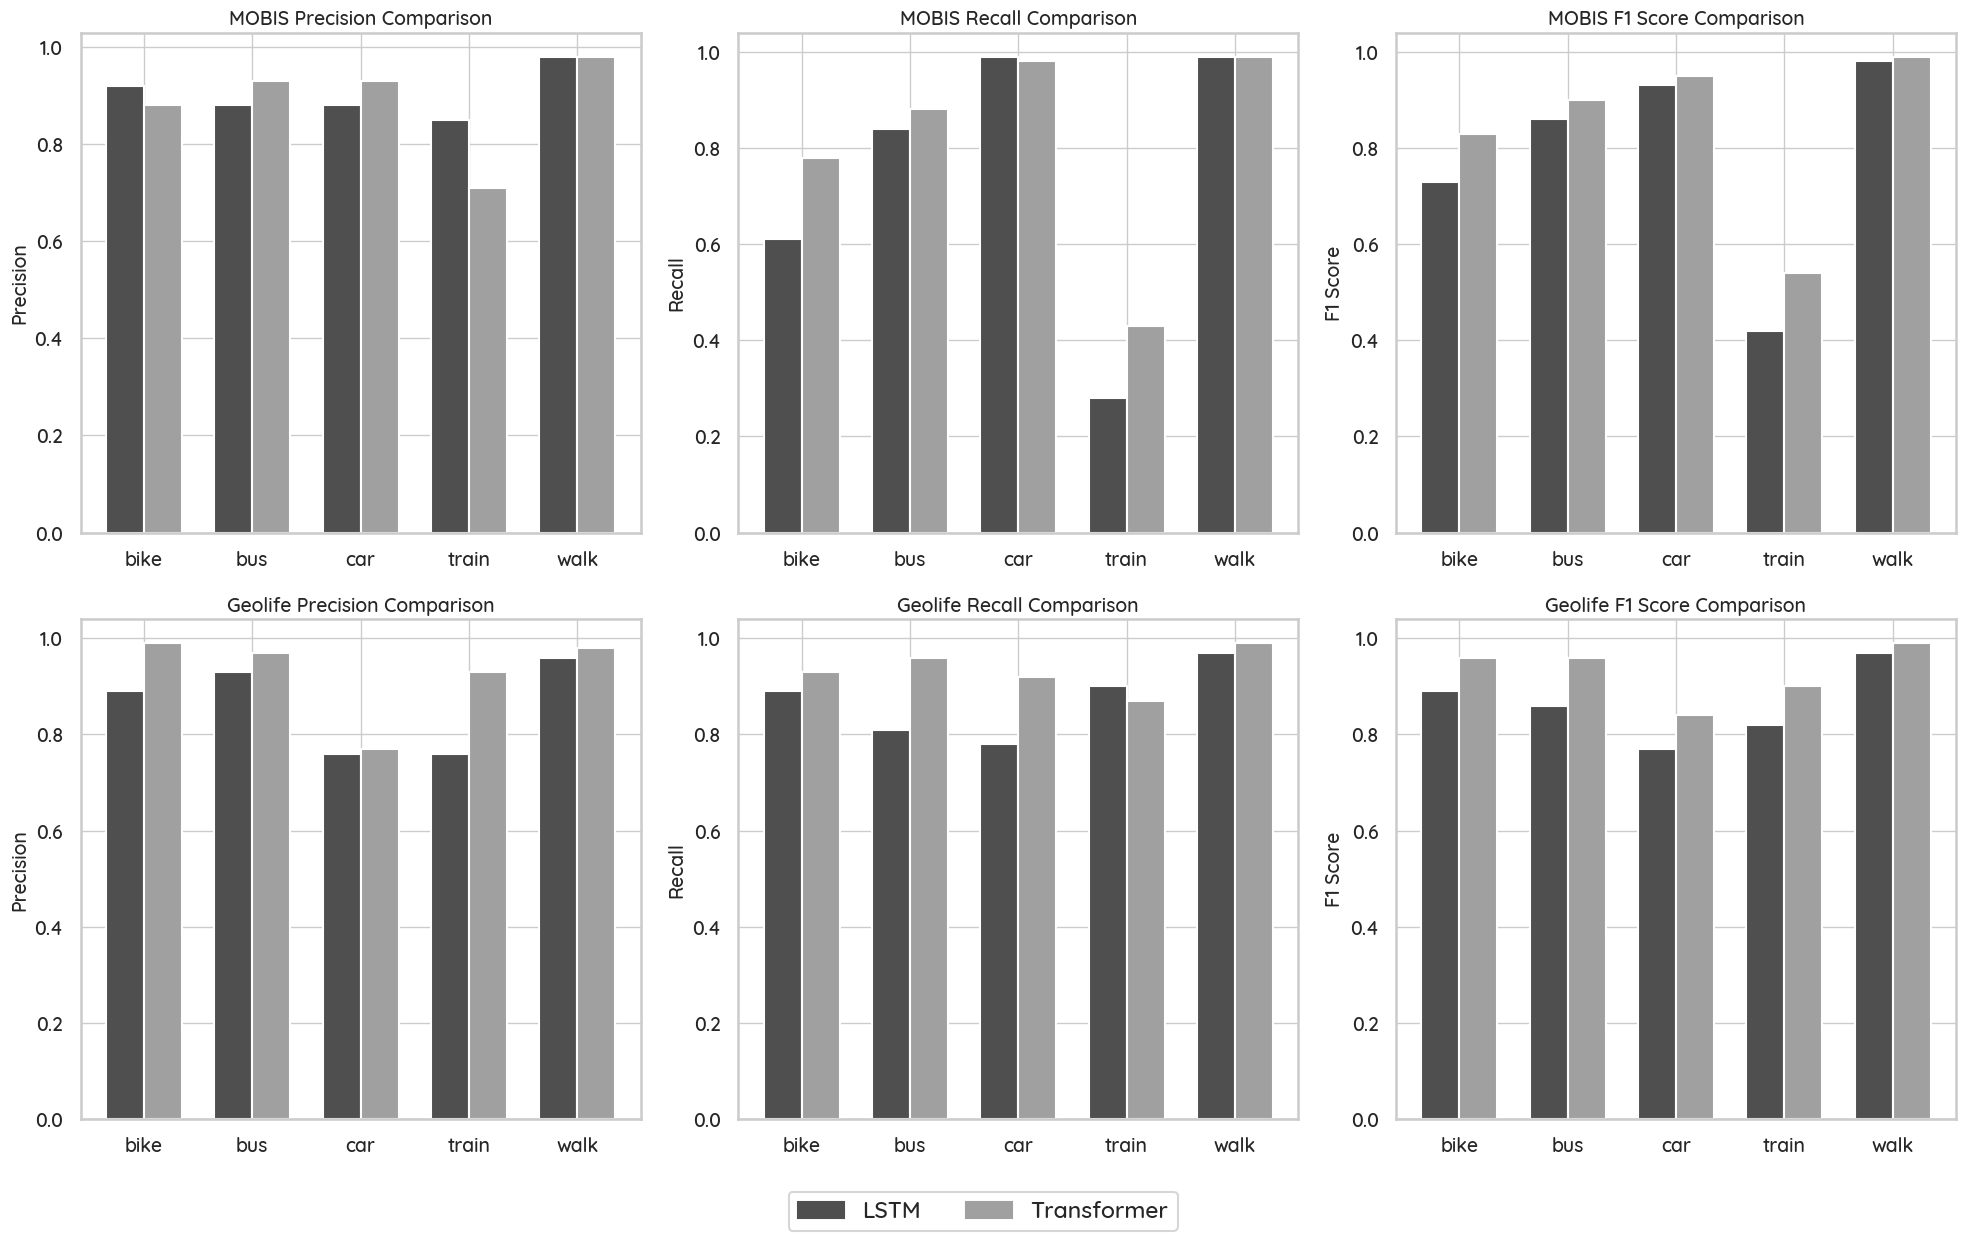

In [6]:
# Create the figure and axes for a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
bar_width = 0.35
index = np.arange(len(modes))

color_lstm = "#4f4f4f"  # Dark grey
color_transformer = "#a0a0a0"  # Light grey
# Define colors and labels for the bars
colors = [color_lstm, color_transformer]
labels = ['LSTM', 'Transformer']

# Iterate through axes and datasets to plot the bars
for row, (lstm_data, transformer_data, dataset) in enumerate([
    ((lstm_mobis_precision, lstm_mobis_recall, lstm_mobis_f1),
     (transformer_mobis_precision, transformer_mobis_recall, transformer_mobis_f1),
     "MOBIS"),
    
    ((lstm_geolife_precision, lstm_geolife_recall, lstm_geolife_f1),
     (transformer_geolife_precision, transformer_geolife_recall, transformer_geolife_f1),
     "Geolife")
]):
    for col, metric in enumerate(['Precision', 'Recall', 'F1 Score']):
        axes[row, col].bar(index - bar_width / 2, lstm_data[col], bar_width, color=colors[0])
        axes[row, col].bar(index + bar_width / 2, transformer_data[col], bar_width, color=colors[1])
        axes[row, col].set_title(f"{dataset} {metric} Comparison")
        axes[row, col].set_ylabel(metric)
        axes[row, col].set_xticks(index)
        axes[row, col].set_xticklabels(modes)

# Create a single legend for all plots, centered at the bottom
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
fig.legend(handles, labels, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.05))

# Adjust spacing to fit the legend properly
plt.tight_layout()
save_path = f"comparisons.png" 
plt.savefig(save_path, dpi=300, bbox_inches='tight') 
plt.show()


## Finetuning

In [22]:
index = np.arange(len(data_sizes))
index

array([0, 1, 2, 3, 4])

In [2]:
import pandas as pd
lstm_precision = {
    'bike': [26, 27, 33, 35, 18],
    'bus': [92, 93, 94, 94, 95],
    'car': [86, 87, 88, 87, 84],
    'train': [66, 88, 96, 96, 85],
    'walk': [80, 78, 80, 86, 83]
}
lstm_df = pd.DataFrame(lstm_precision, index=[5, 10, 15, 20, 40])
lstm_df

,bike,bus,car,train,walk
5,26,92,86,66,80
10,27,93,87,88,78
15,33,94,88,96,80
20,35,94,87,96,86
40,18,95,84,85,83


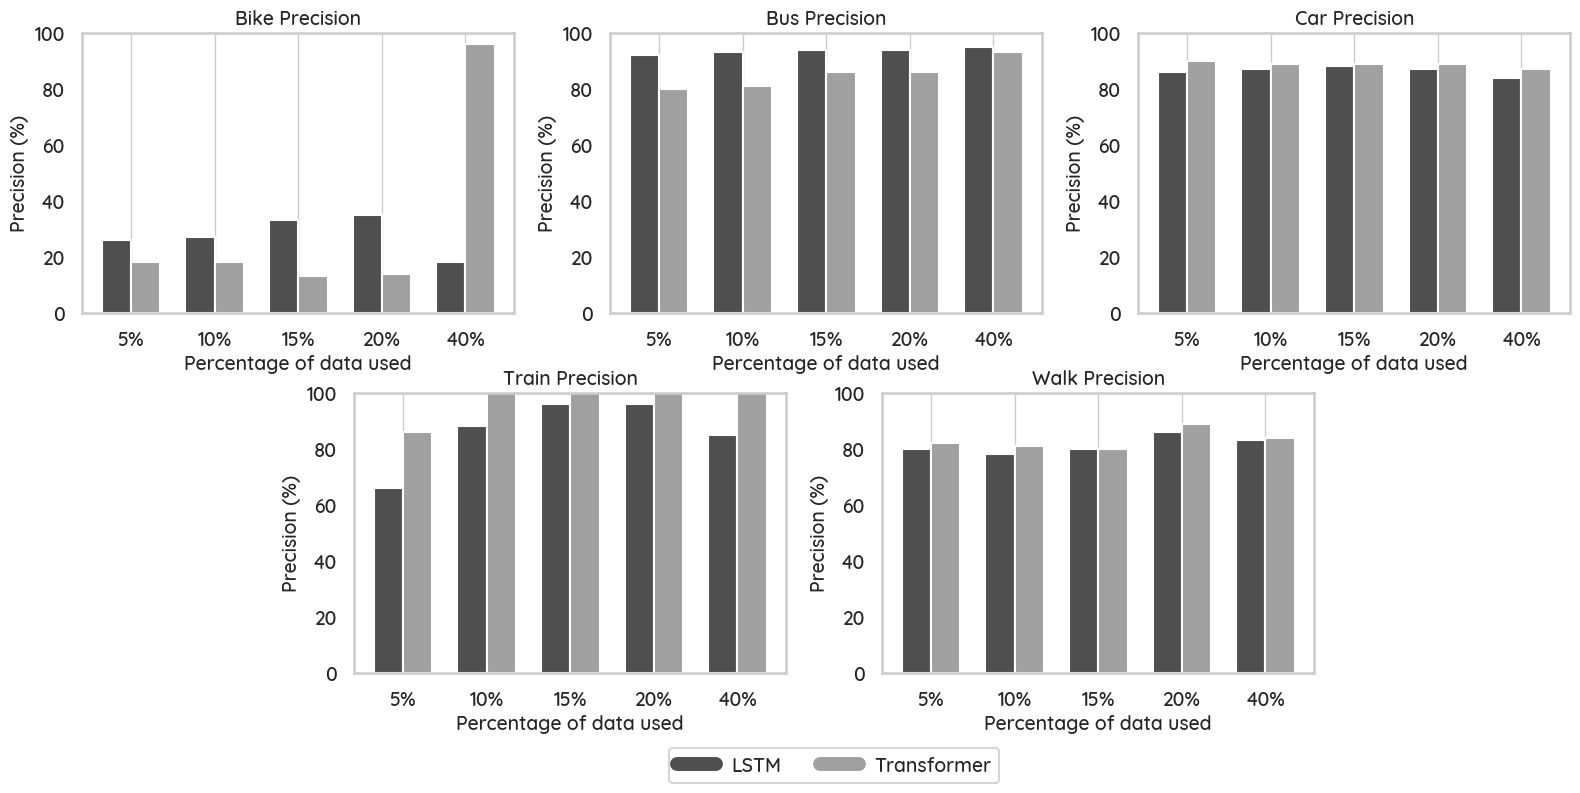

In [8]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# --------------------
# Your data and config
# --------------------
labels = ['bike', 'bus', 'car', 'train', 'walk']
data_sizes_perc = [5, 10, 15, 20, 40]
data_sizes = [31, 62, 94, 125, 251]

bar_width = 0.35
index = np.arange(len(data_sizes))

lstm_precision = {
    'bike': [26, 27, 33, 35, 18],
    'bus': [92, 93, 94, 94, 95],
    'car': [86, 87, 88, 87, 84],
    'train': [66, 88, 96, 96, 85],
    'walk': [80, 78, 80, 86, 83]
}

transformer_precision = {
    'bike': [18, 18, 13, 14, 96],
    'bus': [80, 81, 86, 86, 93],
    'car': [90, 89, 89, 89, 87],
    'train': [86, 100, 100, 100, 100],
    'walk': [82, 81, 80, 89, 84]
}

color_lstm = "#4f4f4f"  # Dark grey
color_transformer = "#a0a0a0"  # Light grey
# Define colors and labels for the bars
colors = [color_lstm, color_transformer]
sns.set_theme(
    style="whitegrid",
    palette=colors,
    font="Quicksand Medium",
    rc={
        "grid.linewidth": 1,
        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
        "axes.titlesize": 14,
        "axes.labelsize": 14,
        "legend.frameon": True
    },
    context="talk"
)

# ----------------------------
# Create a 2×3 figure of axes
# ----------------------------
fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.ravel()

# We'll use only five of them:
#  - Top row: axes[0], axes[1], axes[2]
#  - Bottom row (centered): axes[4], axes[5]
# Remove axes[3] (bottom-left)
axes[3].remove()

# Plot each label onto a designated axis
labels_to_axes = {
    'bike':  axes[0],
    'bus':   axes[1],
    'car':   axes[2],
    'train': axes[4],
    'walk':  axes[5]
}

for label, ax in labels_to_axes.items():
    ax.bar(index - bar_width/2, lstm_precision[label],
           width=bar_width, color=colors[0], label='LSTM')
    ax.bar(index + bar_width/2, transformer_precision[label],
           width=bar_width, color=colors[1], label='Transformer')
    ax.set_title(f'{label.capitalize()} Precision')
    ax.set_xlabel('Percentage of data used')
    ax.set_ylabel('Precision (%)')
    ax.set_xticks(index)
    ax.set_xticklabels([f"{perc}%" for perc in data_sizes_perc])
    ax.set_ylim(0, 100)
    ax.grid(axis='y')

# -----------------------------------------------------
# Manually adjust subplot positions so:
#  - Top three each occupy 1/3 of total figure width,
#  - Bottom two also each occupy 1/3 of total figure width,
#    but together they are centered horizontally.
# -----------------------------------------------------
# Each position is [left, bottom, width, height].

axes[0].set_position([0.00, 0.55, 0.27, 0.35])  # top-left
axes[1].set_position([0.33, 0.55, 0.27, 0.35])  # top-center
axes[2].set_position([0.66, 0.55, 0.27, 0.35])  # top-right

# Bottom row (two subplots in the middle), each 0.33 wide => total 0.66 => left edge 0.17
axes[4].set_position([0.17, 0.10, 0.27, 0.35])  # bottom-left (centered)
axes[5].set_position([0.50, 0.10, 0.27, 0.35])  # bottom-right (centered)
# ---------------------------
# Single legend for the figure
# ---------------------------
handles = [
    plt.Line2D([0], [0], color=colors[0], lw=10, label='LSTM'),
    plt.Line2D([0], [0], color=colors[1], lw=10, label='Transformer')
]
fig.legend(handles=handles, loc='lower center', ncol=2, bbox_to_anchor=(0.47, -0.05), fontsize=14)

plt.savefig("finetuning_mobis_mp_classes.png", dpi=300, bbox_inches='tight')
plt.show()


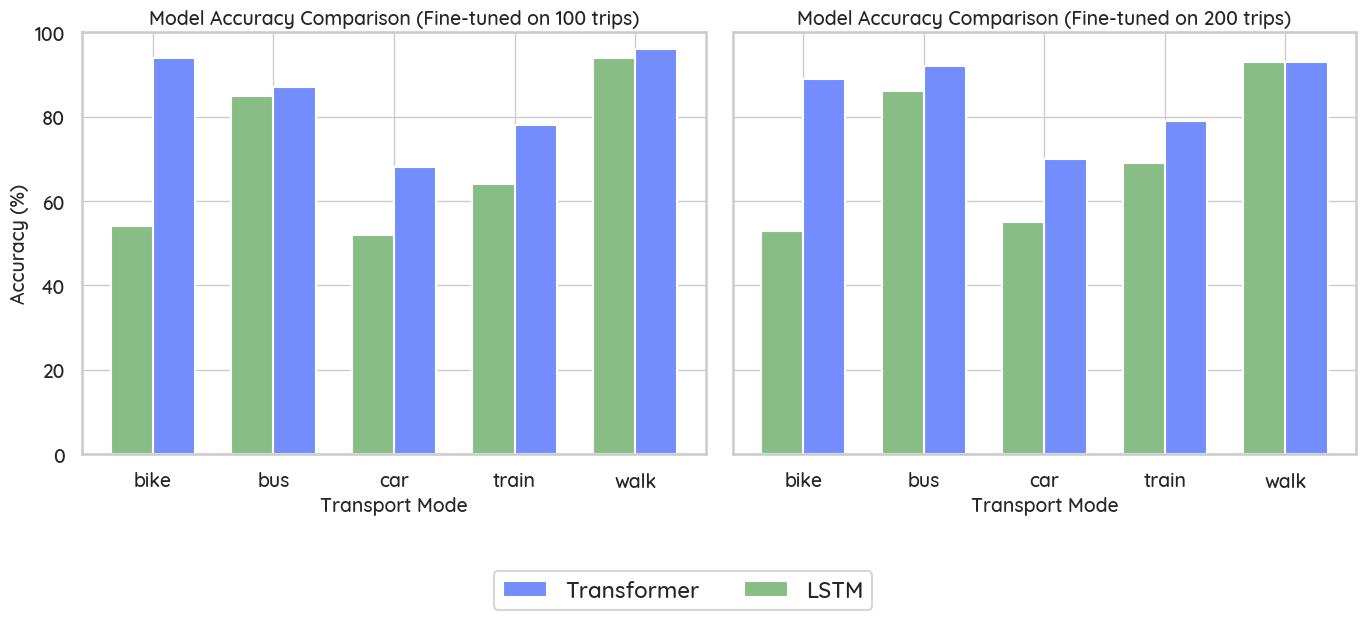

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

color_lstm = "#4f4f4f"  # Dark grey
color_transformer = "#a0a0a0"  # Light grey

color_lstm = "#88bd85"  # Dark grey
color_transformer = "#748dfc"  # Light grey
# Define colors and labels for the bars
colors = [color_lstm, color_transformer]
sns.set_theme(style="whitegrid", 
              palette="dark", 
              font="Quicksand Medium", 
              rc={
                "grid.linewidth": 1,
                "xtick.labelsize": 14,
                "ytick.labelsize": 14,
                "axes.titlesize": 14,
                "axes.labelsize": 14,
                "legend.frameon": True
              }, 
              context="talk")

# Transport modes and accuracies for 1% and 2% of the data
modes = ['bike', 'bus', 'car', 'train', 'walk']

# 1% data accuracies
lstm_1 = [54, 85, 52, 64, 94]
transformer_1 = [94, 87, 68, 78, 96]

# 2% data accuracies
lstm_2 = [53, 86, 55, 69, 93]
transformer_2 = [89, 92, 70, 79, 93]

# Set the bar width
bar_width = 0.35
x = np.arange(len(modes))
# Adjusting the plot to show both figures in one line with one legend
fig, axs = plt.subplots(1, 2, figsize=(14, 8), sharey=True)

# 1% data plot
axs[0].bar(x + bar_width/2, transformer_1, bar_width, label='Transformer', color=colors[1])
axs[0].bar(x - bar_width/2, lstm_1, bar_width, label='LSTM', color=colors[0])
axs[0].set_xlabel('Transport Mode')
axs[0].set_ylabel('Accuracy (%)')
axs[0].set_title('Model Accuracy Comparison (Fine-tuned on 100 trips)')
axs[0].set_xticks(x)
axs[0].set_xticklabels(modes)
axs[0].set_ylim(0, 100)

# 2% data plot
axs[1].bar(x + bar_width/2, transformer_2, bar_width, color=colors[1])
axs[1].bar(x - bar_width/2, lstm_2, bar_width, color=colors[0])
axs[1].set_xlabel('Transport Mode')
axs[1].set_title('Model Accuracy Comparison (Fine-tuned on 200 trips)')
axs[1].set_xticks(x)
axs[1].set_xticklabels(modes)
axs[1].set_ylim(0, 100)

# Adding a common legend below both plots
fig.legend(['Transformer','LSTM'], loc='lower center', ncol=2, fontsize=16, frameon=True)
plt.tight_layout(rect=[0, 0.1, 1, 0.8])
save_path = f"finetuning_geolife_classes.png" 
plt.savefig(save_path, dpi=300, bbox_inches='tight') 
plt.show()

## EXTRA

In [14]:
import pandas as pd

# Load the CSV files
df1 = pd.read_csv('/data/A-TrajectoryTransformer/data/miniprogram1.csv')
df2 = pd.read_csv('/data/A-TrajectoryTransformer/data/miniprogram2.csv')
df3 = pd.read_csv('/data/A-TrajectoryTransformer/data/miniprogram3.csv')

# Concatenate all dataframes
combined = pd.concat([df1, df2, df3], ignore_index=True)

# Count the total number of unique traj_ids before removal
total_unique_traj_ids = combined['traj_id'].nunique()

# Identify the unique traj_ids and remove duplicates (keeping the first full trajectory)
unique_traj_ids = combined.drop_duplicates(subset='traj_id', keep='first')['traj_id']

# Count the unique traj_ids after removal
remaining_unique_traj_ids = unique_traj_ids.nunique()

# Calculate the number of dropped unique traj_ids
dropped_traj_ids = total_unique_traj_ids - remaining_unique_traj_ids

# Filter to keep only rows with the selected unique traj_id
result = combined[combined['traj_id'].isin(unique_traj_ids)]

# Display the result and the count of dropped traj_ids
print(f"Number of unique traj_id dropped: {dropped_traj_ids}")
print(f"Number of unique traj_id retained: {remaining_unique_traj_ids}")

Number of unique traj_id dropped: 0
Number of unique traj_id retained: 2152


In [13]:
result.to_csv('/data/A-TrajectoryTransformer/data/miniprogram_merged.csv')

In [15]:
import pandas as pd
df = pd.read_csv('/data/A-TrajectoryTransformer/data/miniprogram_merged_speed_statistics.csv')
df

,label,count,mean,std,min,max,num_trips,percentile_10,percentile_25,percentile_50,percentile_75,percentile_90
0,walk,376273,3.019790,3.216707,0.100014,14.999632,1623,0.283950,0.655041,1.860086,4.235510,7.520926
1,car,40885,32.702078,27.876181,3.000429,179.572043,205,4.716344,10.157680,25.526845,47.178410,71.160769
2,bus,32547,21.630642,26.163828,1.000014,119.996834,259,1.790174,3.432483,8.434118,32.279008,63.862125
3,bike,4901,15.574184,18.014511,0.501067,79.846176,36,1.074648,2.761329,7.084282,22.416550,44.869650
4,train,1505,76.619358,79.676910,3.049910,349.721998,46,5.184927,14.388273,56.576113,95.490633,195.551539


In [16]:
import pandas as pd

# Load your data (assuming it's in a CSV file for demonstration purposes)
data = pd.read_csv('/data/A-TrajectoryTransformer/data/miniprogram_merged.csv')

# Separate the 'walk' trips and other trips
walk_trips = data[data['label'] == 'walk']
other_trips = data[data['label'] != 'walk']

# Randomly sample 150 unique 'walk' trips based on traj_id
unique_walk_traj_ids = walk_trips['traj_id'].unique()
selected_walk_traj_ids = pd.Series(unique_walk_traj_ids).sample(n=100, random_state=42)

# Filter the walk trips to keep only the selected ones
filtered_walk_trips = walk_trips[walk_trips['traj_id'].isin(selected_walk_traj_ids)]

# Combine the filtered walk trips with the other trips
data_filtered = pd.concat([filtered_walk_trips, other_trips])

# Save the filtered dataset (optional)
data_filtered.to_csv('/data/A-TrajectoryTransformer/data/miniprogram_balanced.csv', index=False)

# Display the result
print("Filtered dataset ready!")


Filtered dataset ready!


In [2]:
import pandas as pd
pd.read_csv('/data/A-TrajectoryTransformer/data/miniprogram_balanced_speed_statistics.csv')

,label,count,mean,std,min,max,num_trips,percentile_10,percentile_25,percentile_50,percentile_75,percentile_90
0,walk,28985,3.021462,3.187396,0.100367,14.998261,100,0.314418,0.698190,1.870245,4.203030,7.536564
1,car,40885,32.702078,27.876181,3.000429,179.572043,205,4.716344,10.157680,25.526845,47.178410,71.160769
2,bus,32547,21.630642,26.163828,1.000014,119.996834,259,1.790174,3.432483,8.434118,32.279008,63.862125
3,bike,4901,15.574184,18.014511,0.501067,79.846176,36,1.074648,2.761329,7.084282,22.416550,44.869650
4,train,1505,76.619358,79.676910,3.049910,349.721998,46,5.184927,14.388273,56.576113,95.490633,195.551539


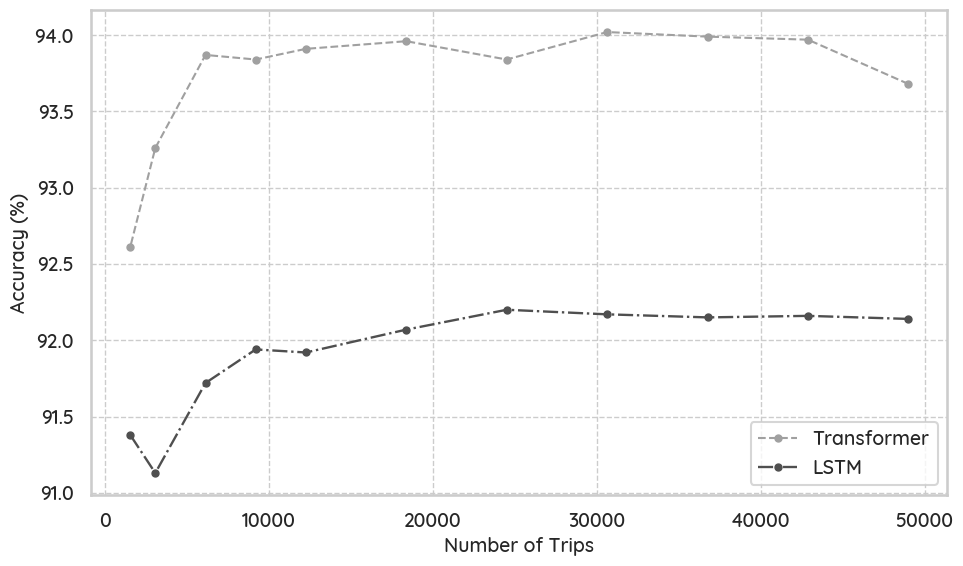

In [1]:
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for aesthetic plots
sns.set_theme(style="whitegrid", 
              palette="dark", 
              font="Quicksand Medium", 
              rc={
                "grid.linewidth": 1,    # Thinner gridlines
                "xtick.labelsize": 14,       # X-axis tick labels
                "ytick.labelsize": 14,       # Y-axis tick labels
                "axes.titlesize": 14,     # Larger title font
                "axes.labelsize": 14,     # Adjust label font size
                "legend.frameon": True,   # Add a frame to the legend
                  }, 
              context="talk")

# Define grey shades
color_lstm = "#4f4f4f"  # Dark grey
color_transformer = "#a0a0a0"  # Light grey

# Paths to logs
train_log_path = "/data/A-TrajectoryTransformer/models/transformer/mobis_seq/train.log"
lstm_log_path = "/data/A-TrajectoryTransformer/models/lstm/mobis_seq/lstm.log"

# Function to extract test accuracies
def extract_test_accuracies(file_path, pattern):
    with open(file_path, 'r') as file:
        content = file.read()
    accuracies = re.findall(pattern, content)
    return [float(acc) for acc in accuracies]

# Define patterns
transformer_pattern = r"Test Accuracy:\s*([\d.]+)"
lstm_pattern = r"Test Accuracy:\s*([\d.]+)%"

# Extract test accuracies
transformer_accuracies = extract_test_accuracies(train_log_path, transformer_pattern)
transformer_accuracies = [acc * 100 for acc in transformer_accuracies]
lstm_accuracies = extract_test_accuracies(lstm_log_path, lstm_pattern)

# Ensure 11 points
transformer_accuracies = transformer_accuracies[:11]
lstm_accuracies = lstm_accuracies[:11]

transformer_accuracies_reversed = transformer_accuracies[::-1]
lstm_accuracies_reversed = lstm_accuracies[::-1]

# Map percentages to corresponding trips
total_trips = 1530962 / 0.025
percentage_to_trips = [0.025, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
trips_labels = [round(total_trips * pct / 1000) for pct in percentage_to_trips]
trips_labels_reversed = trips_labels[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(trips_labels_reversed, transformer_accuracies, marker='o', linestyle='--', linewidth=1.5, markersize=5, color=color_transformer, label='Transformer')
plt.plot(trips_labels_reversed, lstm_accuracies, marker='o', linestyle='-.', linewidth=1.7, markersize=5, color=color_lstm, label='LSTM')

# Titles and labels
# plt.title('Test Accuracies: Transformer vs LSTM (Trips)', fontsize=14)
plt.xlabel('Number of Trips', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.grid(True, linestyle='--', alpha=1)
plt.legend(loc='lower right', fontsize=14)
plt.tight_layout()

# Save and display
save_path = "test_accuracies_comparison.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()
